#### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols,logit
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.decomposition import PCA
from impyute import mice
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
! pip install xgboost

#### Loading IPL Player Statistics Dataset from Kaggle (The closest dataset i could find which resembled and had same attributes as the research paper 2)

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
df = pd.read_csv("IPL Player Stats Dataset.csv")

#### Displaying the first 5 rows of the dataset

In [4]:
df.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,100,50,0,4s,6s,Bowling Innings,Overs Bowled,Maidens Bowled,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,178.89,0,1,1,15,12,12,44.0,0,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,163.82,0,1,0,15,6,9,31.0,0,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,176.92,0,0,0,3,2,4,14.0,0,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,122.43,0,0,0,13,3,5,7.0,0,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,136.08,1,3,0,52,13,-,-,-,-,-,-,-,-,-,-,-,2,2


#### Displaying the last 5 rows of the dataset

In [5]:
df.tail()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,100,50,0,4s,6s,Bowling Innings,Overs Bowled,Maidens Bowled,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
626,Delhi Capitals,S Lamichhane,IPL 2019,6,1,0,0,0,0.00,1,0.00,0,0,1,0,0,6,23.0,0,210,8,3/40,26.25,9.13,17.2,0,0,2,0
627,Delhi Capitals,CA Ingram,IPL 2019,12,12,2,184,47,18.40,154,119.48,0,0,0,20,5,-,-,-,-,-,-,-,-,-,-,-,1,0
628,Delhi Capitals,SE Rutherford,IPL 2019,7,7,2,73,28*,14.60,54,135.18,0,0,0,2,7,6,6.5,0,59,1,1/6,59.00,8.63,41.0,0,0,5,0
629,Delhi Capitals,KMA Paul,IPL 2019,8,6,1,18,7,3.60,24,75.00,0,0,2,1,1,8,27.1,0,237,9,3/17,26.33,8.72,18.1,0,0,5,0
630,Delhi Capitals,GH Vihari,IPL 2019,2,2,0,4,2,2.00,8,50.00,0,0,0,0,0,1,1.0,0,9,0,-,-,9.00,-,0,0,0,0


#### Displaying the basic information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
Team                    631 non-null object
Player                  631 non-null object
Tournament              631 non-null object
Matches                 631 non-null int64
Batting Innings         631 non-null object
Not Out                 631 non-null object
Runds Scored            631 non-null object
Highest Score           631 non-null object
Batting Average         631 non-null object
Balls Faced             631 non-null object
Batting Strike Rate     631 non-null object
100                     631 non-null object
50                      631 non-null object
0                       631 non-null object
4s                      631 non-null object
6s                      631 non-null object
Bowling Innings         631 non-null object
Overs Bowled            631 non-null object
Maidens Bowled          631 non-null object
Runs Conceded           631 non-null object
Wickets Taken   

#### Displaying the basic statistics of the dataset

In [7]:
df.describe(include="all")

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,Batting Strike Rate,100,50,0,4s,6s,Bowling Innings,Overs Bowled,Maidens Bowled,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
count,631,631,631,631.000000,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631.000000,631.000000
unique,12,268,4,NaN,18,11,266,187,305,238,397,5,11,5,66,39,18,158,6,274,28,144,285,271,166,5,3,NaN,NaN
top,Royal Challengers Bangalore,KA Pollard,IPL 2019,NaN,1,1,-,-,-,-,-,0,0,0,0,0,-,-,0,-,-,-,-,-,-,0,0,NaN,NaN
freq,84,4,162,NaN,103,179,62,62,130,62,70,551,393,369,151,199,218,218,362,218,218,285,285,218,285,381,407,NaN,NaN
mean,NaN,NaN,NaN,8.332805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.830428,0.131537
std,NaN,NaN,NaN,5.055268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.073402,0.657173
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000


#### Displaying the number of columns and rows in the dataset after dropping the unnecessary attributes

In [8]:
df.shape

(631, 29)

#### Displaying the name of the columns 

In [9]:
df.columns

Index(['Team', 'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken', 'Stumpings Made'], dtype='object')

#### Checking for missing values in the dataset

In [10]:
df.isnull().sum() # Per column

Team                    0
Player                  0
Tournament              0
Matches                 0
Batting Innings         0
Not Out                 0
Runds Scored            0
Highest Score           0
Batting Average         0
Balls Faced             0
Batting Strike Rate     0
100                     0
50                      0
0                       0
4s                      0
6s                      0
Bowling Innings         0
Overs Bowled            0
Maidens Bowled          0
Runs Conceded           0
Wickets Taken           0
Best Bowling Figures    0
Bowling Average         0
Bowling Economy Rate    0
Bowling Strike Rate     0
4+ Innings Wickets      0
5+ Innings Wickets      0
Catches Taken           0
Stumpings Made          0
dtype: int64

In [11]:
df.isnull().sum().sum() # There are no missing values in the dataset

0

#### Data Cleaning

In [12]:
df.rename(columns={"Runds Scored":"Runs Scored"},inplace=True) # Correcting the name of the column

Dropping unecessary attributes to match the dataset used in the research paper.

In [13]:
df.drop(["Matches","Not Out","Balls Faced","4s","6s","Maidens Bowled","Runs Conceded","Best Bowling Figures","Bowling Economy Rate","Catches Taken","Stumpings Made"],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 18 columns):
Team                   631 non-null object
Player                 631 non-null object
Tournament             631 non-null object
Batting Innings        631 non-null object
Runs Scored            631 non-null object
Highest Score          631 non-null object
Batting Average        631 non-null object
Batting Strike Rate    631 non-null object
100                    631 non-null object
50                     631 non-null object
0                      631 non-null object
Bowling Innings        631 non-null object
Overs Bowled           631 non-null object
Wickets Taken          631 non-null object
Bowling Average        631 non-null object
Bowling Strike Rate    631 non-null object
4+ Innings Wickets     631 non-null object
5+ Innings Wickets     631 non-null object
dtypes: object(18)
memory usage: 88.8+ KB


Converting all the objects into integer or float

In [15]:
df["Batting Innings"]=pd.to_numeric(df['Batting Innings'], errors='coerce')
df["Runs Scored"]=pd.to_numeric(df['Runs Scored'], errors='coerce')
df["Highest Score"]=pd.to_numeric(df['Highest Score'], errors='coerce')
df["Batting Average"]=pd.to_numeric(df['Batting Average'], errors='coerce')
df["Batting Strike Rate"]=pd.to_numeric(df['Batting Strike Rate'], errors='coerce')
df["100"]=pd.to_numeric(df['100'], errors='coerce')
df["50"]=pd.to_numeric(df['50'], errors='coerce')
df["0"]=pd.to_numeric(df['0'], errors='coerce')
df["Bowling Innings"]=pd.to_numeric(df['Bowling Innings'], errors='coerce')
df["Overs Bowled"]=pd.to_numeric(df['Overs Bowled'], errors='coerce')
df["Wickets Taken"]=pd.to_numeric(df['Wickets Taken'], errors='coerce')
df["Bowling Average"]=pd.to_numeric(df['Bowling Average'], errors='coerce')
df["Bowling Strike Rate"]=pd.to_numeric(df['Bowling Strike Rate'], errors='coerce')
df["4+ Innings Wickets"]=pd.to_numeric(df['4+ Innings Wickets'], errors='coerce')
df["5+ Innings Wickets"]=pd.to_numeric(df['5+ Innings Wickets'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 18 columns):
Team                   631 non-null object
Player                 631 non-null object
Tournament             631 non-null object
Batting Innings        569 non-null float64
Runs Scored            569 non-null float64
Highest Score          343 non-null float64
Batting Average        501 non-null float64
Batting Strike Rate    561 non-null float64
100                    569 non-null float64
50                     569 non-null float64
0                      569 non-null float64
Bowling Innings        413 non-null float64
Overs Bowled           413 non-null float64
Wickets Taken          413 non-null float64
Bowling Average        346 non-null float64
Bowling Strike Rate    346 non-null float64
4+ Innings Wickets     413 non-null float64
5+ Innings Wickets     413 non-null float64
dtypes: float64(15), object(3)
memory usage: 88.8+ KB


Whilst looking at the head and tail of the dataset, we observed that there are "-" in the data which needs to be dealt with.

In [17]:
df[(df=="-")==False].isnull().sum()  # Number of "-" in the dataset(in each column)

C:\ana\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Team                     0
Player                   0
Tournament               0
Batting Innings         62
Runs Scored             62
Highest Score          288
Batting Average        130
Batting Strike Rate     70
100                     62
50                      62
0                       62
Bowling Innings        218
Overs Bowled           218
Wickets Taken          218
Bowling Average        285
Bowling Strike Rate    285
4+ Innings Wickets     218
5+ Innings Wickets     218
dtype: int64

Converting all the "-" into null values so that we can impute them with either central measures of tendency(mean,median or mode) or dropping them or imputing them by pattern or an algorithm.

In [18]:
df["Batting Innings"].replace("-",np.NaN,inplace=True)
df["Runs Scored"].replace("-",np.NaN,inplace=True)
df["Highest Score"].replace("-",np.NaN,inplace=True)
df["Batting Average"].replace("-",np.NaN,inplace=True)
df["Batting Strike Rate"].replace("-",np.NaN,inplace=True)
df["100"].replace("-",np.NaN,inplace=True)
df["50"].replace("-",np.NaN,inplace=True)
df["0"].replace("-",np.NaN,inplace=True)
df["Bowling Innings"].replace("-",np.NaN,inplace=True)
df["Overs Bowled"].replace("-",np.NaN,inplace=True)
df["Wickets Taken"].replace("-",np.NaN,inplace=True)
df["Bowling Average"].replace("-",np.NaN,inplace=True)
df["Bowling Strike Rate"].replace("-",np.NaN,inplace=True)
df["4+ Innings Wickets"].replace("-",np.NaN,inplace=True)
df["5+ Innings Wickets"].replace("-",np.NaN,inplace=True)

In [19]:
df.isnull().sum()

Team                     0
Player                   0
Tournament               0
Batting Innings         62
Runs Scored             62
Highest Score          288
Batting Average        130
Batting Strike Rate     70
100                     62
50                      62
0                       62
Bowling Innings        218
Overs Bowled           218
Wickets Taken          218
Bowling Average        285
Bowling Strike Rate    285
4+ Innings Wickets     218
5+ Innings Wickets     218
dtype: int64

In [20]:
df["Highest Score"]= df["Highest Score"].replace('*','') # Removing special character ("*") from highest score attribute

In [21]:
df.isnull().sum().sum()

2458

Removing the first three columns Team, Player and Tournament from the dataset because they are not useful to predict the performance.

In [22]:
df.drop(["Team","Player","Tournament"],axis=1,inplace=True)

We will be imputing these null values by MICE(Multivariate Imputation by Chained Equations) Algorithm. I am not going to using the basic methodologies like central measures of tendency (mean, median or mode) or by pattern because they cannot be as accurate as the MICE algorithm and they will invite biasness to the data.

In [23]:
df = mice(df) #This algorithm may take 3-5 minutes to compute as its highly computational.

C:\ana\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [24]:
df.isnull().sum() #Checking if the mice algorithm worked properly.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

Adding the columns names back as the mice algorithm makes the columns names in numerical as 0,1,2,3,4...so on.

In [25]:
df.columns = ["Batting Innings","Runs Scored","Highest Score","Batting Average","Batting Strike Rate","100","50","0","Bowling Innings","Overs Bowled","Wickets Taken","Bowling Average","Bowling Strike Rate","4+ Innings Wickets","5+ Innings Wickets"]

In [26]:
df.head(5)

,Batting Innings,Runs Scored,Highest Score,Batting Average,Batting Strike Rate,100,50,0,Bowling Innings,Overs Bowled,Wickets Taken,Bowling Average,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets
0,7.0,195.0,70.105168,65.00,178.89,0.0,1.0,1.0,12.00000,44.000000,13.00000,23.690000,20.300000,0.000000,0.0000
1,9.0,154.0,49.742999,30.80,163.82,0.0,1.0,0.0,9.00000,31.000000,12.00000,20.000000,15.500000,1.000000,0.0000
2,4.0,46.0,50.256495,46.00,176.92,0.0,0.0,0.0,4.00000,14.000000,3.00000,47.660000,28.000000,0.000000,0.0000
3,8.0,191.0,51.888496,38.20,122.43,0.0,0.0,0.0,5.00000,7.000000,2.00000,27.500000,21.000000,0.000000,0.0000
4,13.0,445.0,108.000000,37.08,136.08,1.0,3.0,0.0,3.47628,0.949121,-2.01561,61.290955,34.704226,0.045528,-0.0537


Making one attributes out of two, like in the research paper.

In [27]:
df["Four/Five Wicket Haul"] = df["4+ Innings Wickets"]+df["5+ Innings Wickets"]

In [28]:
df.drop(["4+ Innings Wickets","5+ Innings Wickets"],axis=1,inplace=True)

#### Creating derived attributes (Feature Extraction)

#### Consistency:
Formula for batting:
Consistency = 0.4262*average + 0.2566*no. of innings + 0.1510*SR + 0.0787*Centuries +0.0556*Fifties – 0.0328*Zeros

Formula for bowling:
Consistency = 0.4174*no. of overs + 0.2634*no. of innings + 0.1602*SR + 0.0975*average +0.0615*FF 

#### Form:
Formula for batting:
Form = 0.4262*average + 0.2566*no. of innings + 0.1510*SR + 0.0787*Centuries +0.0556*Fifties – 0.0328*Zeros

Formula for bowling:
Form = 0.3269*no. of overs + 0.2846*no. of innings + 0.1877*SR + 0.1210*average + 0.0798*FF 

#### Opposition:
Formula for batting:
Opposition = 0.4262*average + 0.2566*no. of innings + 0.1510*SR + 0.0787*Centuries +0.0556*Fifties – 0.0328*Zeros

Formula for bowling:
Opposition = 0.3177*no. of overs + 0.3177*no. of innings + 0.1933*SR + 0.1465*average +0.0943*FF 

#### Venue:
Formula for batting:
Venue = 0.4262*average + 0.2566*no. of innings + 0.1510*SR + 0.0787*Centuries +0.0556*Fifties + 0.0328*HS

Formula for bowling:
Venue = 0.3018*no. of overs + 0.2783*no. of innings + 0.1836*SR + 0.1391*average +0.0972*FF 


In [29]:
df["Consistency for Batting"]=(0.4262*df["Batting Average"])+(0.2566*df["Batting Innings"])+(0.1510*df["Batting Strike Rate"])+(0.0787*df["100"])+(0.0556*df["50"])-(0.0328*df["0"])
df["Consistency for Bowling"]=(0.4174*df["Overs Bowled"])+(0.2634*df["Bowling Innings"])+(0.1602*df["Bowling Strike Rate"])+(0.0975*df["Bowling Average"])+(0.0615*df["Four/Five Wicket Haul"])
df["Form for Batting"]=(0.4262*df["Batting Average"])+(0.2566*df["Batting Innings"])+(0.1510*df["Batting Strike Rate"])+(0.0787*df["100"])+(0.0556*df["50"])-(0.0328*df["0"])
df["Form for Bowling"]=(0.3269*df["Overs Bowled"])+(0.2846*df["Bowling Innings"])+(0.1877*df["Bowling Strike Rate"])+(0.1210*df["Bowling Average"])+( 0.0798*df["Four/Five Wicket Haul"])
df["Opposition for Batting"]=(0.4262*df["Batting Average"])+(0.2566*df["Batting Innings"])+(0.1510*df["Batting Strike Rate"])+(0.0787*df["100"])+(0.0556*df["50"])-(0.0328*df["0"])
df["Opposition for Bowling"]=(0.3177*df["Overs Bowled"])+(0.3177*df["Bowling Innings"])+( 0.1933*df["Bowling Strike Rate"])+(0.1465*df["Bowling Average"])+(0.0943*df["Four/Five Wicket Haul"])
df["Venue for Batting"]=(0.4262*df["Batting Average"])+(0.2566*df["Batting Innings"])+(0.1510*df["Batting Strike Rate"])+(0.0787*df["100"])+(0.0556*df["50"])+(0.0328*df["Highest Score"])
df["Venue for Bowling"]=(0.3018*df["Overs Bowled"])+(0.2783*df["Bowling Innings"])+(0.1836*df["Bowling Strike Rate"])+(0.1391*df["Bowling Average"])+(0.0972*df["Four/Five Wicket Haul"])

In [30]:
df.head()

,Batting Innings,Runs Scored,Highest Score,Batting Average,Batting Strike Rate,100,50,0,Bowling Innings,Overs Bowled,Wickets Taken,Bowling Average,Bowling Strike Rate,Four/Five Wicket Haul,Consistency for Batting,Consistency for Bowling,Form for Batting,Form for Bowling,Opposition for Batting,Opposition for Bowling,Venue for Batting,Venue for Bowling
0,7.0,195.0,70.105168,65.00,178.89,0.0,1.0,1.0,12.00000,44.000000,13.00000,23.690000,20.300000,0.000000,56.534390,27.088235,56.534390,24.475600,56.534390,25.185775,58.866640,23.641159
1,9.0,154.0,49.742999,30.80,163.82,0.0,1.0,0.0,9.00000,31.000000,12.00000,20.000000,15.500000,1.000000,40.228780,19.804600,40.228780,18.104450,40.228780,18.728450,41.860350,17.585500
2,4.0,46.0,50.256495,46.00,176.92,0.0,0.0,0.0,4.00000,14.000000,3.00000,47.660000,28.000000,0.000000,47.346520,16.029650,47.346520,16.737460,47.346520,18.113190,48.994933,17.108706
3,8.0,191.0,51.888496,38.20,122.43,0.0,0.0,0.0,5.00000,7.000000,2.00000,27.500000,21.000000,0.000000,36.820570,10.284250,36.820570,10.980500,36.820570,11.900450,38.522513,11.184950
4,13.0,445.0,108.000000,37.08,136.08,1.0,3.0,0.0,3.47628,0.949121,-2.01561,61.290955,34.704226,-0.008171,39.932876,12.846798,39.932876,15.229154,39.932876,17.092631,43.475276,16.150367


As the 4.3.5(Rating the attributes section) in the research paper was very unclear and confusing, we are going to use quantile cut function from pandas on both our target variables(Runs Scored and Wickets Taken) and proceed with the machine learning model.

In [31]:
df["Runs Scored"]=pd.qcut(df["Runs Scored"],q=4,labels=["1","2","3","4"])

In [32]:
df["Wickets Taken"]=pd.qcut(df["Wickets Taken"],q=4,labels=["1","2","3","4"])

In [33]:
df.head()

,Batting Innings,Runs Scored,Highest Score,Batting Average,Batting Strike Rate,100,50,0,Bowling Innings,Overs Bowled,Wickets Taken,Bowling Average,Bowling Strike Rate,Four/Five Wicket Haul,Consistency for Batting,Consistency for Bowling,Form for Batting,Form for Bowling,Opposition for Batting,Opposition for Bowling,Venue for Batting,Venue for Bowling
0,7.0,4,70.105168,65.00,178.89,0.0,1.0,1.0,12.00000,44.000000,4,23.690000,20.300000,0.000000,56.534390,27.088235,56.534390,24.475600,56.534390,25.185775,58.866640,23.641159
1,9.0,3,49.742999,30.80,163.82,0.0,1.0,0.0,9.00000,31.000000,4,20.000000,15.500000,1.000000,40.228780,19.804600,40.228780,18.104450,40.228780,18.728450,41.860350,17.585500
2,4.0,2,50.256495,46.00,176.92,0.0,0.0,0.0,4.00000,14.000000,2,47.660000,28.000000,0.000000,47.346520,16.029650,47.346520,16.737460,47.346520,18.113190,48.994933,17.108706
3,8.0,4,51.888496,38.20,122.43,0.0,0.0,0.0,5.00000,7.000000,2,27.500000,21.000000,0.000000,36.820570,10.284250,36.820570,10.980500,36.820570,11.900450,38.522513,11.184950
4,13.0,4,108.000000,37.08,136.08,1.0,3.0,0.0,3.47628,0.949121,1,61.290955,34.704226,-0.008171,39.932876,12.846798,39.932876,15.229154,39.932876,17.092631,43.475276,16.150367


#### Exploratory Data Analysis (EDA)

In [34]:
runs = df["Runs Scored"]
wickets = df["Wickets Taken"]

Creating a function for EDA (Univariate and Bivariate Analysis)

In [35]:
def eda(col):
    print("************************************Univariate Analysis**************************************************")
    print()
    print()
    print(col.describe())
    print()
    print()
    fig = plt.figure(figsize=(30,5))
    plt.subplot(131)
    sns.boxplot(col)
    plt.subplot(132)    
    sns.distplot(col)    
    plt.subplot(133)
    sns.violinplot(x = col)
    plt.show()
    print()
    print()
    IQR=col.quantile(0.75)-col.quantile(0.25)
    Lower_Limit=col.quantile(0.25)-1.5*IQR
    Upper_Limit=col.quantile(0.75)+1.5*IQR
    print("Total no. of entries : ",len(col))
    print()
    print("The value for left whisker = ",Lower_Limit)
    print()
    print("Datapoints before left whisker : ")
    print((col<Lower_Limit).value_counts())
    print()
    print("The value for right whisker = ",Upper_Limit)
    print()
    print("Datapoints before right whisker : ")
    print((col>Upper_Limit).value_counts())
    print()
    print()
    print("************************************Bivariate Analysis**************************************************")
    print()
    print()
    fig = plt.figure(figsize=(10,5))
    plt.subplot(121)
    sns.boxplot(col,runs)
    plt.subplot(122)
    sns.boxplot(col,wickets)
    print()
    print()

In [36]:
df1=df.copy() # Creating a copy of df to apply EDA function

In [37]:
df1.drop(["Runs Scored","Wickets Taken"],axis=1,inplace=True)

************************************Univariate Analysis**************************************************


count    631.000000
mean       6.138695
std        4.756610
min       -3.211327
25%        2.000000
50%        4.149049
75%       10.000000
max       17.000000
Name: Batting Innings, dtype: float64




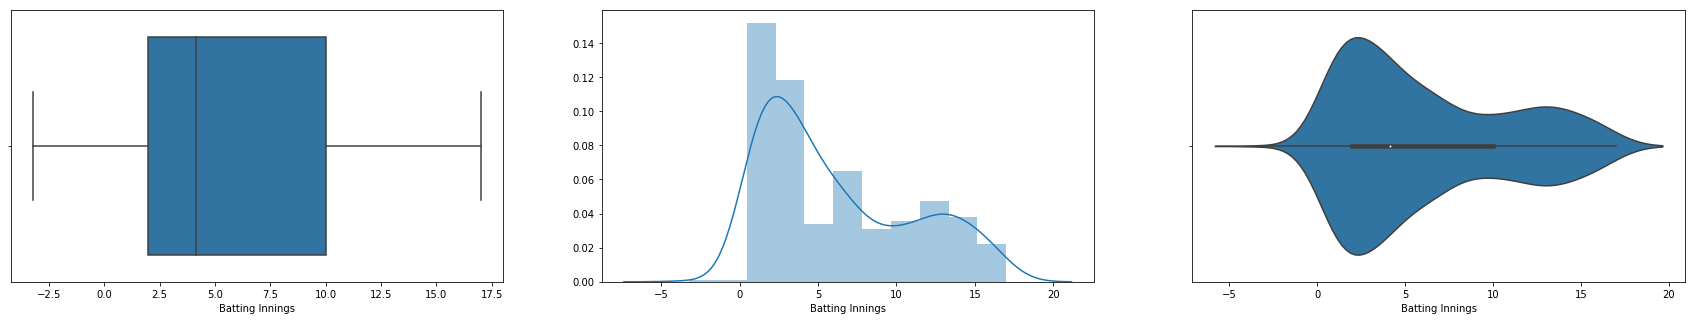



Total no. of entries :  631

The value for left whisker =  -10.0

Datapoints before left whisker : 
False    631
Name: Batting Innings, dtype: int64

The value for right whisker =  22.0

Datapoints before right whisker : 
False    631
Name: Batting Innings, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      36.023288
std       30.073535
min      -15.945326
25%       12.000000
50%       29.000000
75%       53.095165
max      153.592210
Name: Highest Score, dtype: float64




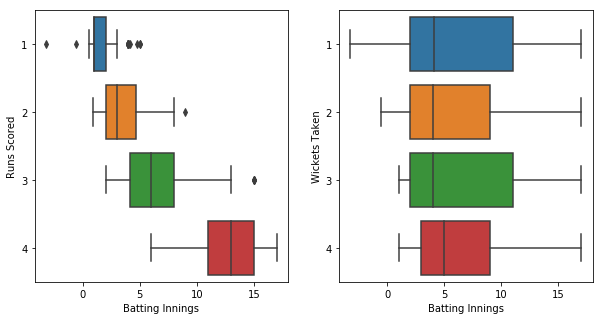

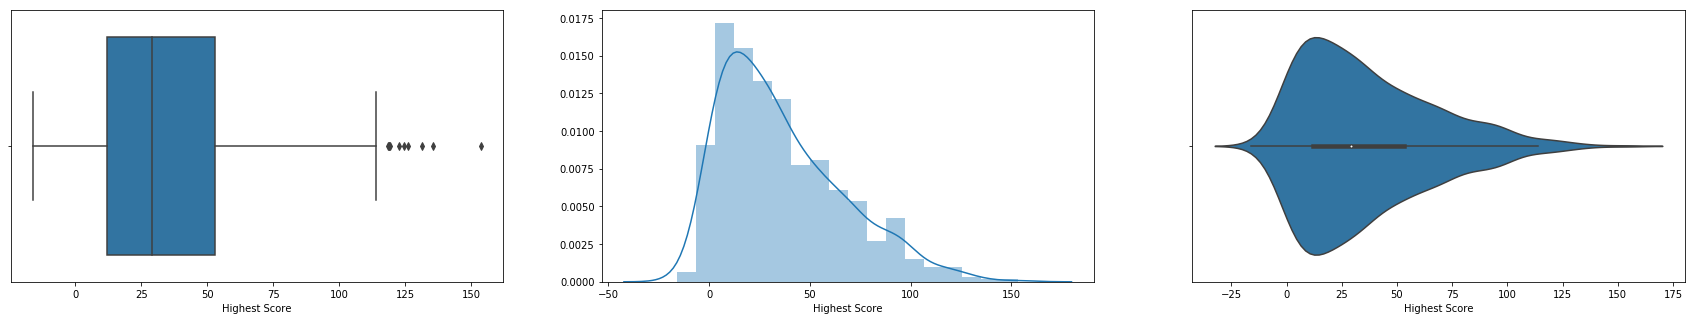



Total no. of entries :  631

The value for left whisker =  -49.64274777066724

Datapoints before left whisker : 
False    631
Name: Highest Score, dtype: int64

The value for right whisker =  114.73791295111207

Datapoints before right whisker : 
False    621
True      10
Name: Highest Score, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      19.227988
std       14.194563
min       -2.223646
25%        8.080147
50%       16.830000
75%       26.566709
max       83.200000
Name: Batting Average, dtype: float64




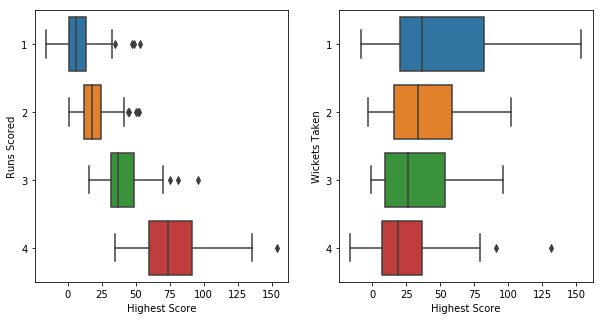

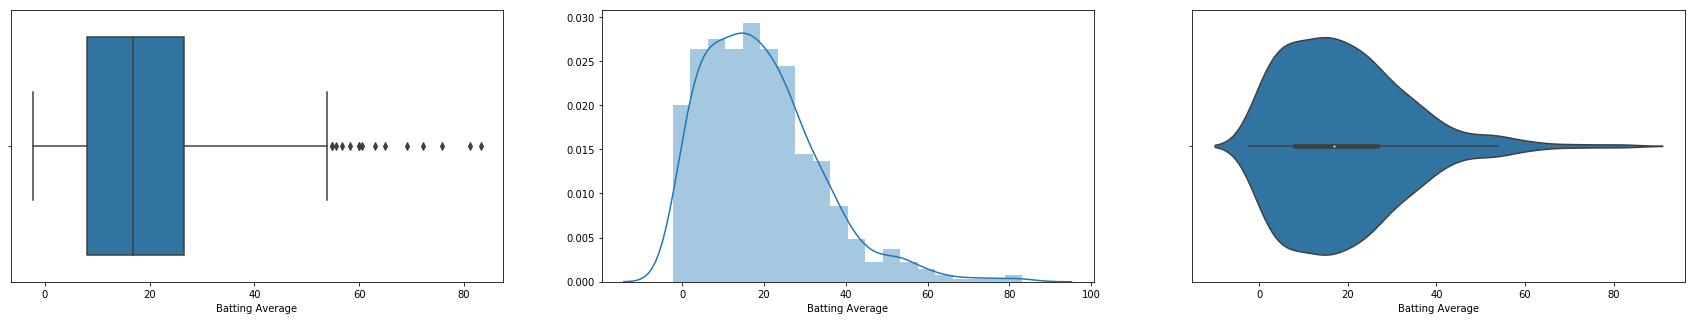



Total no. of entries :  631

The value for left whisker =  -19.64969589337393

Datapoints before left whisker : 
False    631
Name: Batting Average, dtype: int64

The value for right whisker =  54.296551235384825

Datapoints before right whisker : 
False    616
True      15
Name: Batting Average, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean     111.692473
std       47.049651
min        0.000000
25%       92.300000
50%      116.660000
75%      138.145000
max      333.330000
Name: Batting Strike Rate, dtype: float64




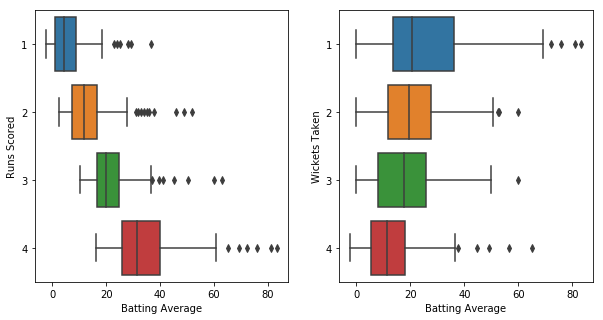

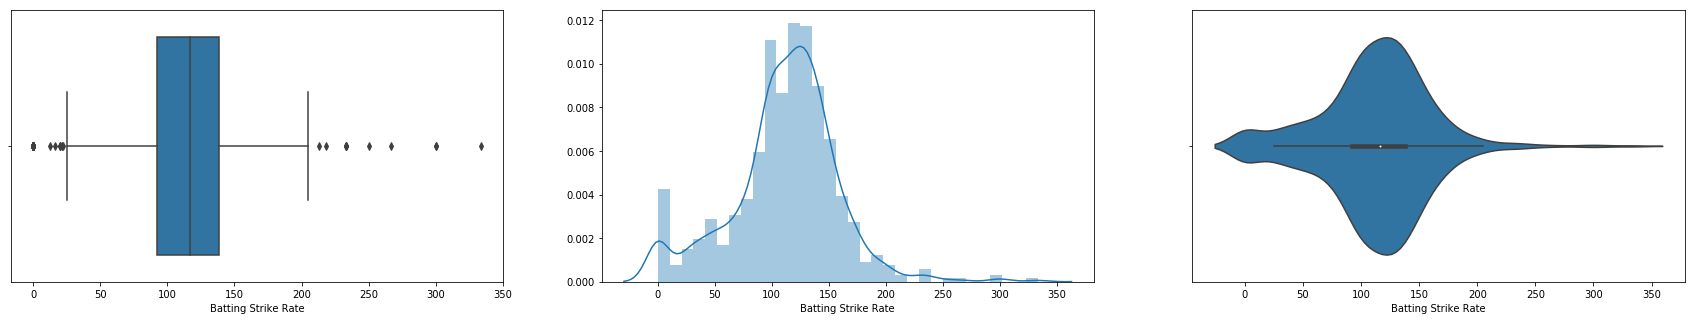



Total no. of entries :  631

The value for left whisker =  23.532500000000013

Datapoints before left whisker : 
False    596
True      35
Name: Batting Strike Rate, dtype: int64

The value for right whisker =  206.91249999999997

Datapoints before right whisker : 
False    620
True      11
Name: Batting Strike Rate, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean       0.040026
std        0.246026
min       -0.088301
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: 100, dtype: float64




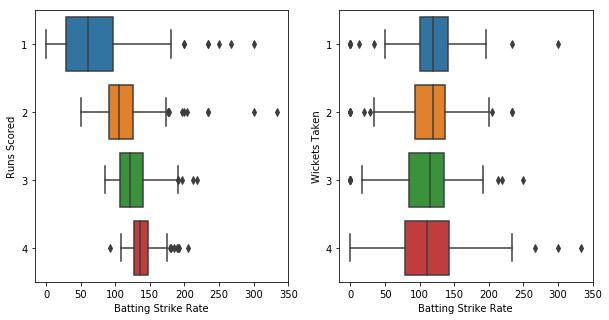

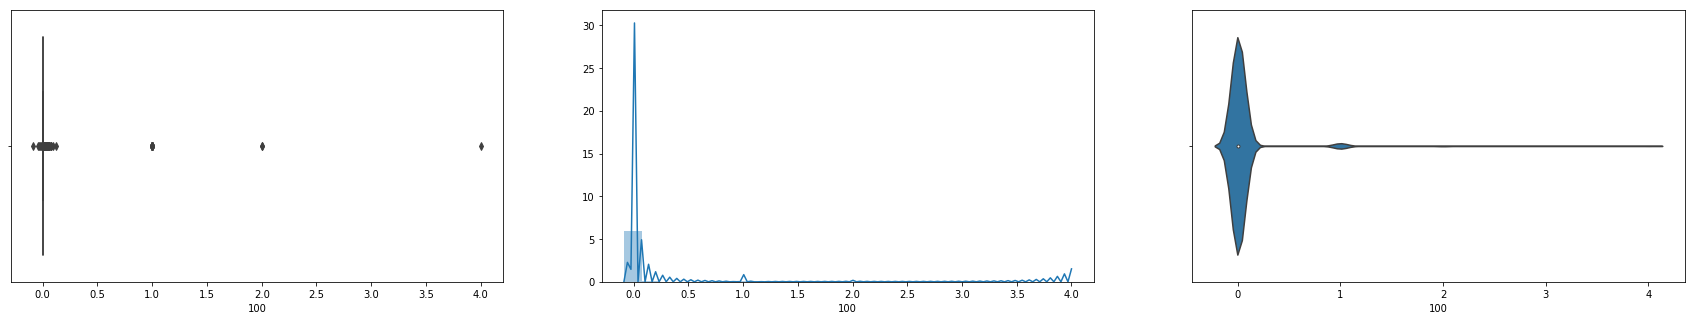



Total no. of entries :  631

The value for left whisker =  0.0

Datapoints before left whisker : 
False    625
True       6
Name: 100, dtype: int64

The value for right whisker =  0.0

Datapoints before right whisker : 
False    557
True      74
Name: 100, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean       0.726628
std        1.344460
min       -1.313473
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: 50, dtype: float64




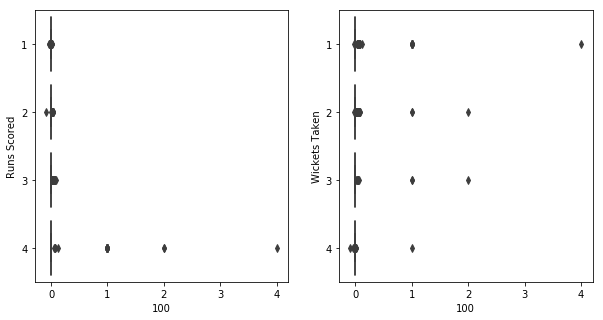

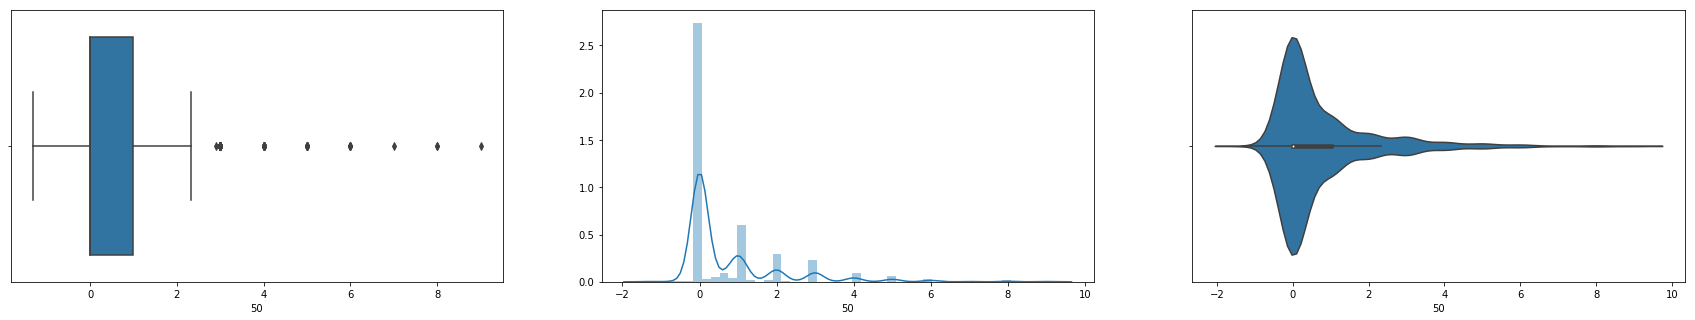



Total no. of entries :  631

The value for left whisker =  -1.5

Datapoints before left whisker : 
False    631
Name: 50, dtype: int64

The value for right whisker =  2.5

Datapoints before right whisker : 
False    566
True      65
Name: 50, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean       0.442261
std        0.680858
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: 0, dtype: float64




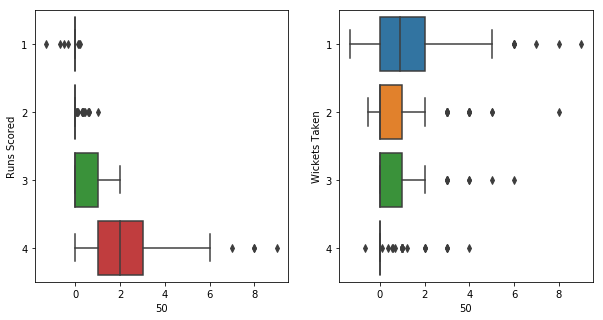

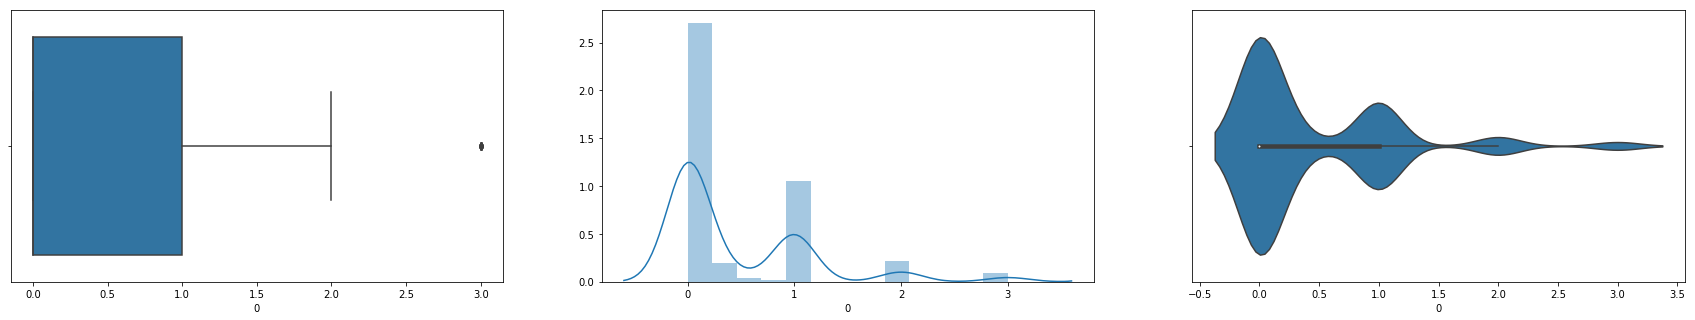



Total no. of entries :  631

The value for left whisker =  -1.5

Datapoints before left whisker : 
False    631
Name: 0, dtype: int64

The value for right whisker =  2.5

Datapoints before right whisker : 
False    617
True      14
Name: 0, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean       6.310375
std        4.339441
min       -9.378246
25%        3.000000
50%        5.606727
75%        9.000000
max       17.000000
Name: Bowling Innings, dtype: float64




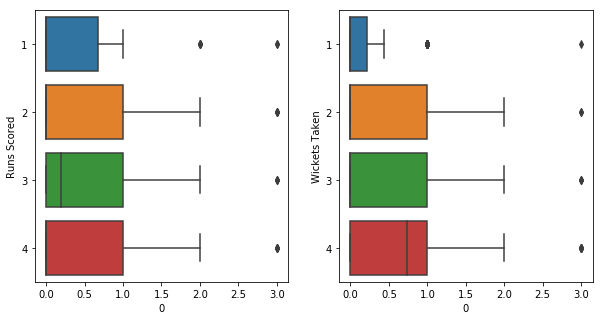

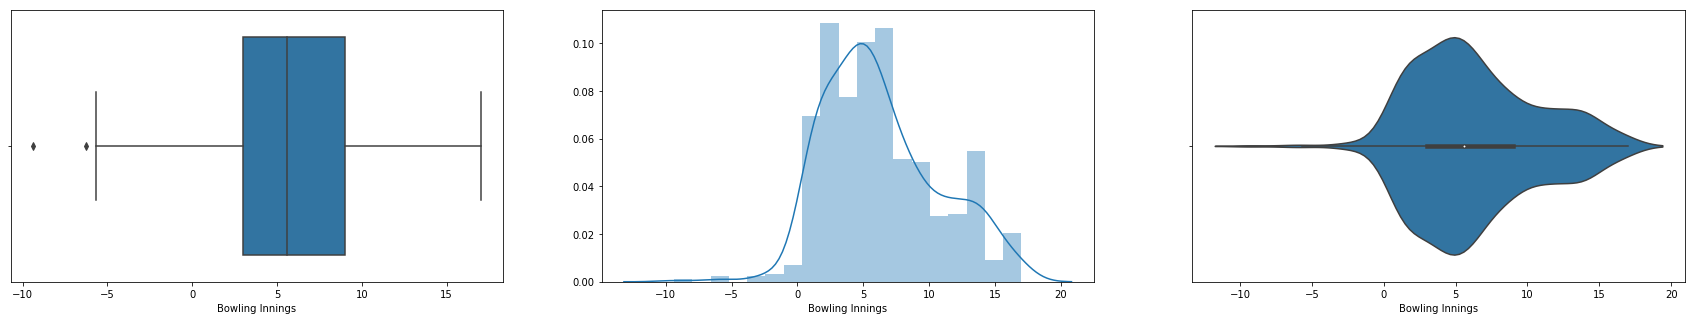



Total no. of entries :  631

The value for left whisker =  -6.0

Datapoints before left whisker : 
False    629
True       2
Name: Bowling Innings, dtype: int64

The value for right whisker =  18.0

Datapoints before right whisker : 
False    631
Name: Bowling Innings, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      19.101875
std       16.307551
min      -37.273979
25%        7.000000
50%       16.182757
75%       27.000000
max       68.000000
Name: Overs Bowled, dtype: float64




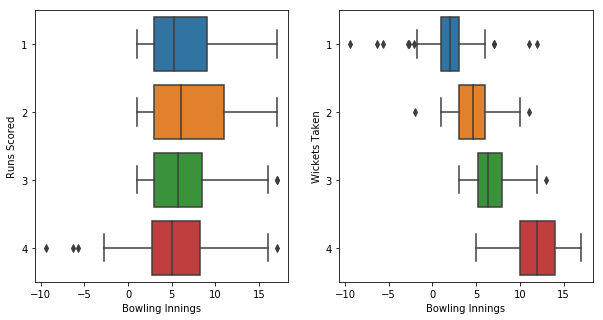

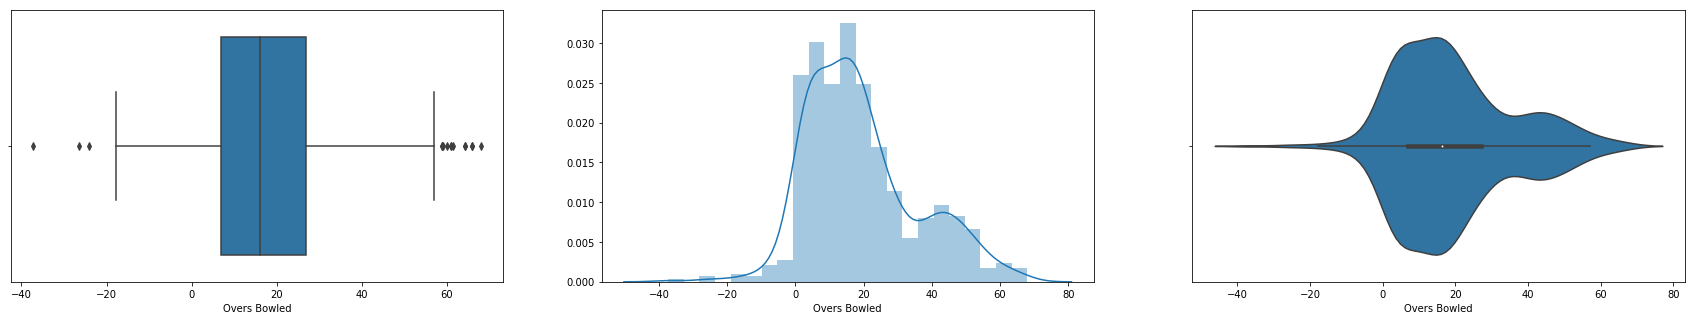



Total no. of entries :  631

The value for left whisker =  -23.0

Datapoints before left whisker : 
False    628
True       3
Name: Overs Bowled, dtype: int64

The value for right whisker =  57.0

Datapoints before right whisker : 
False    619
True      12
Name: Overs Bowled, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      39.002919
std       20.086958
min       -4.206319
25%       27.000000
50%       37.000000
75%       45.396249
max      248.000000
Name: Bowling Average, dtype: float64




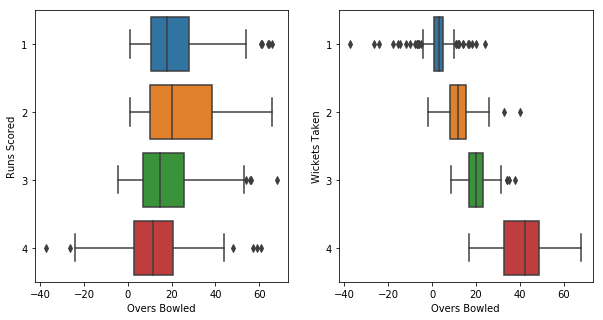

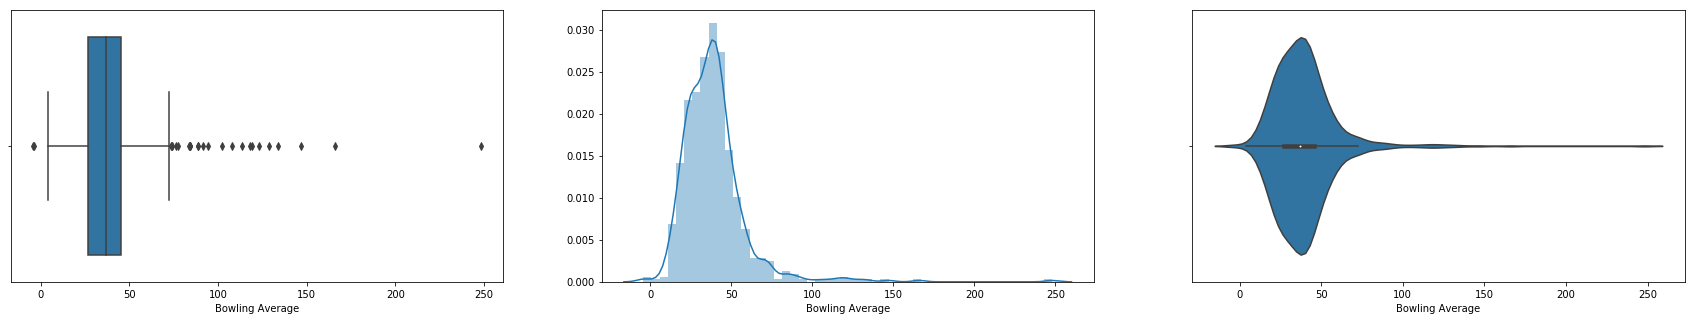



Total no. of entries :  631

The value for left whisker =  -0.5943734031035746

Datapoints before left whisker : 
False    629
True       2
Name: Bowling Average, dtype: int64

The value for right whisker =  72.99062233850596

Datapoints before right whisker : 
False    607
True      24
Name: Bowling Average, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      26.939083
std       11.828299
min        5.000000
25%       21.000000
50%       25.780382
75%       30.634426
max      144.000000
Name: Bowling Strike Rate, dtype: float64




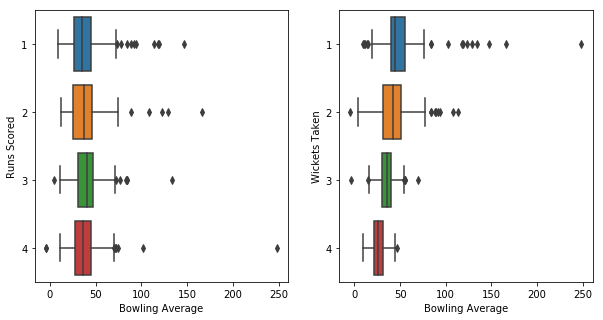

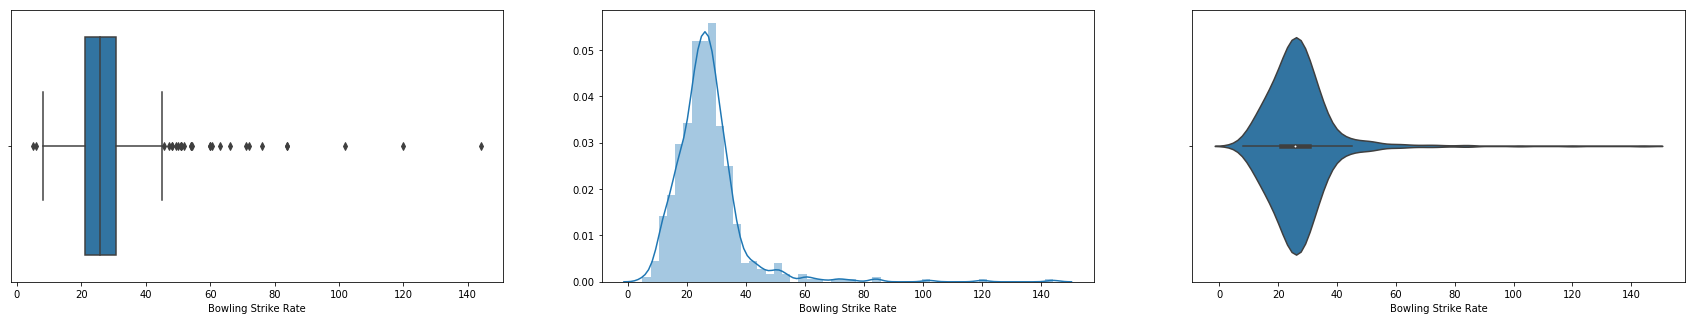



Total no. of entries :  631

The value for left whisker =  6.548360406594604

Datapoints before left whisker : 
False    629
True       2
Name: Bowling Strike Rate, dtype: int64

The value for right whisker =  45.08606598900899

Datapoints before right whisker : 
False    604
True      27
Name: Bowling Strike Rate, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean       0.087421
std        0.288615
min       -0.236831
25%        0.000000
50%        0.000000
75%        0.053347
max        3.000000
Name: Four/Five Wicket Haul, dtype: float64




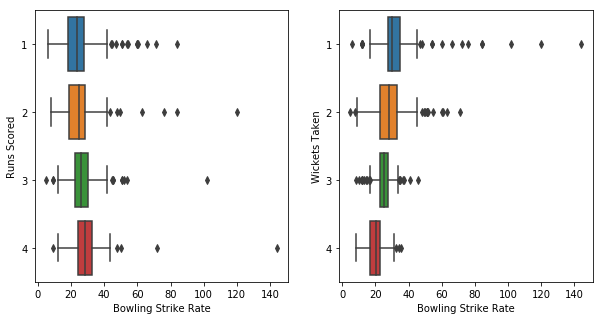

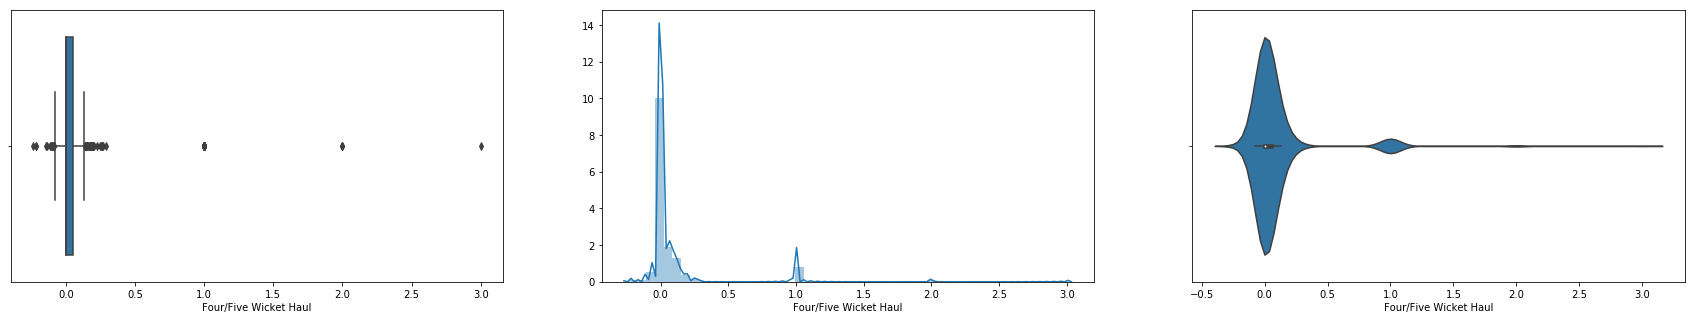



Total no. of entries :  631

The value for left whisker =  -0.0800202784824117

Datapoints before left whisker : 
False    617
True      14
Name: Four/Five Wicket Haul, dtype: int64

The value for right whisker =  0.1333671308040195

Datapoints before right whisker : 
False    562
True      69
Name: Four/Five Wicket Haul, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      26.664765
std       12.645691
min       -0.691118
25%       18.719450
50%       27.173380
75%       35.477893
max       67.205895
Name: Consistency for Batting, dtype: float64




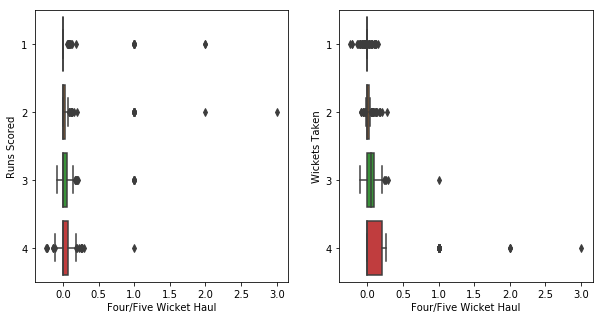

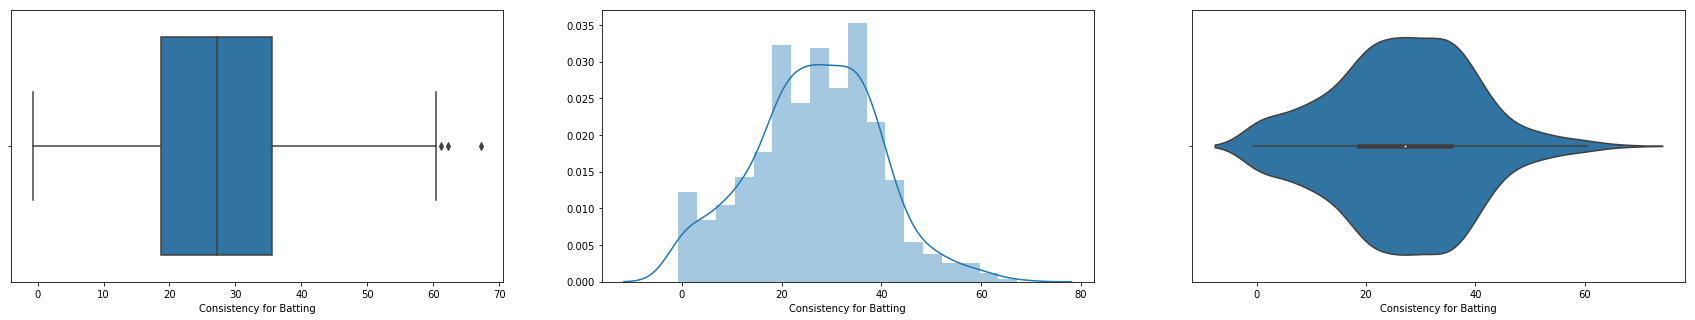



Total no. of entries :  631

The value for left whisker =  -6.418214499999994

Datapoints before left whisker : 
False    631
Name: Consistency for Batting, dtype: int64

The value for right whisker =  60.61555749999999

Datapoints before right whisker : 
False    628
True       3
Name: Consistency for Batting, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      17.759077
std        8.049510
min       -8.639997
25%       11.849286
50%       16.399070
75%       22.522366
max       60.427200
Name: Consistency for Bowling, dtype: float64




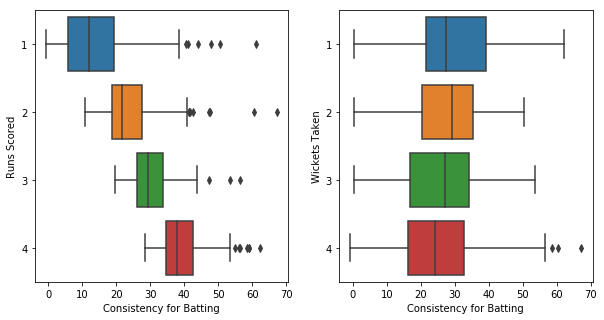

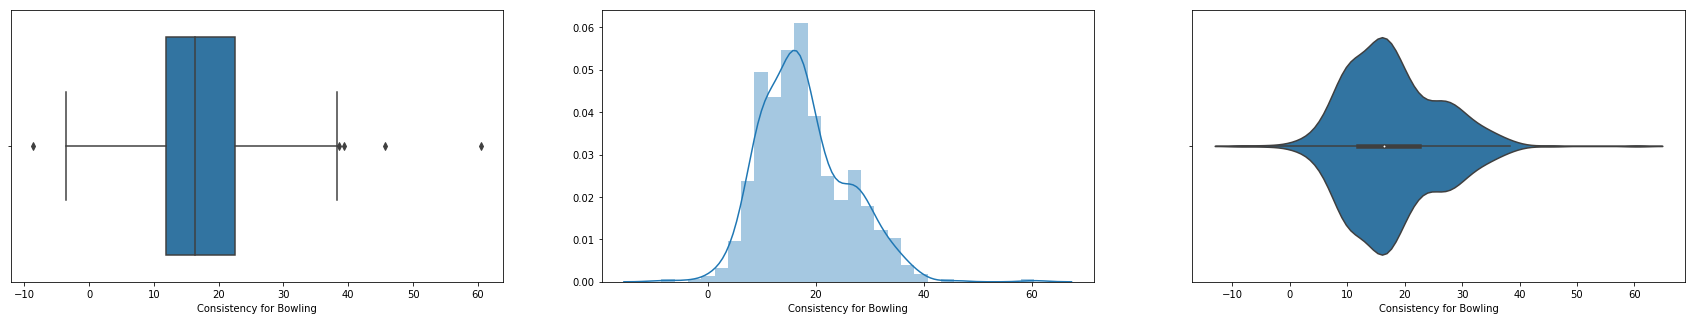



Total no. of entries :  631

The value for left whisker =  -4.160333813031652

Datapoints before left whisker : 
False    630
True       1
Name: Consistency for Bowling, dtype: int64

The value for right whisker =  38.53198641962535

Datapoints before right whisker : 
False    627
True       4
Name: Consistency for Bowling, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      26.664765
std       12.645691
min       -0.691118
25%       18.719450
50%       27.173380
75%       35.477893
max       67.205895
Name: Form for Batting, dtype: float64




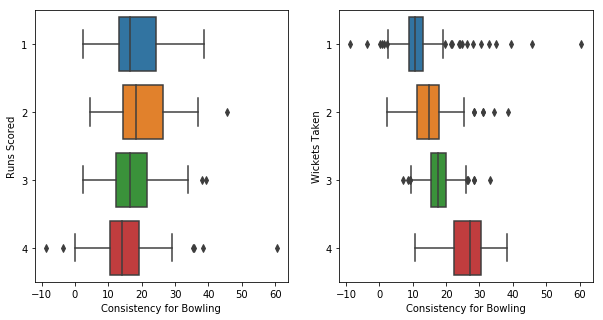

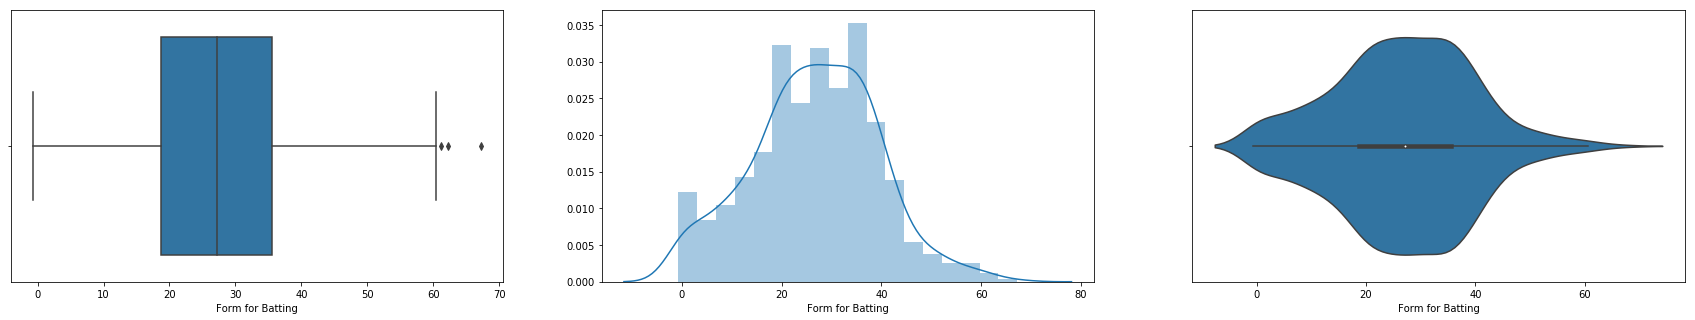



Total no. of entries :  631

The value for left whisker =  -6.418214499999994

Datapoints before left whisker : 
False    631
Name: Form for Batting, dtype: int64

The value for right whisker =  60.61555749999999

Datapoints before right whisker : 
False    628
True       3
Name: Form for Batting, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      17.823131
std        7.175727
min       -3.625224
25%       13.072401
50%       16.760900
75%       22.054540
max       68.297600
Name: Form for Bowling, dtype: float64




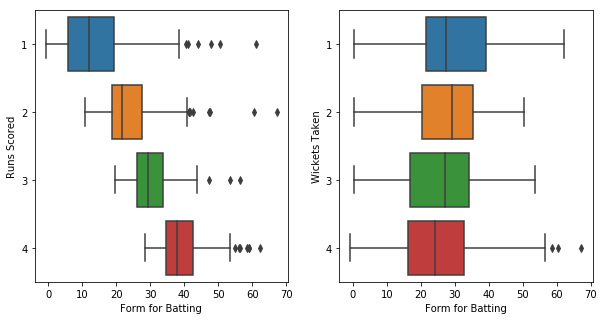

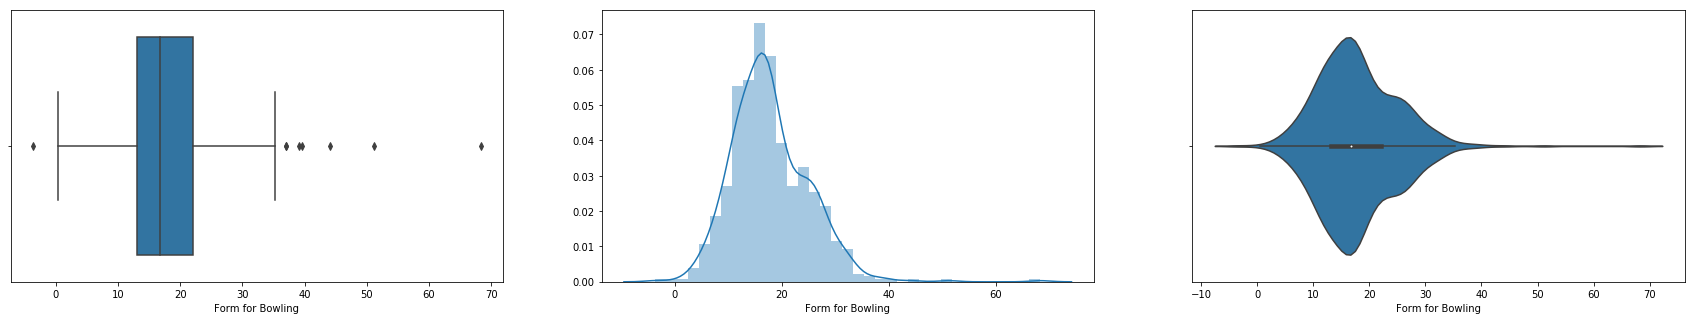



Total no. of entries :  631

The value for left whisker =  -0.40080757236174414

Datapoints before left whisker : 
False    630
True       1
Name: Form for Bowling, dtype: int64

The value for right whisker =  35.527748704445955

Datapoints before right whisker : 
False    624
True       7
Name: Form for Bowling, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      26.664765
std       12.645691
min       -0.691118
25%       18.719450
50%       27.173380
75%       35.477893
max       67.205895
Name: Opposition for Batting, dtype: float64




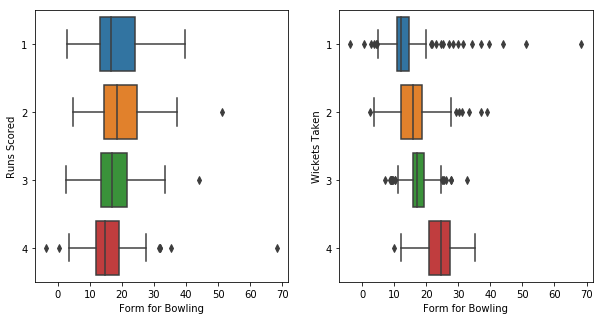

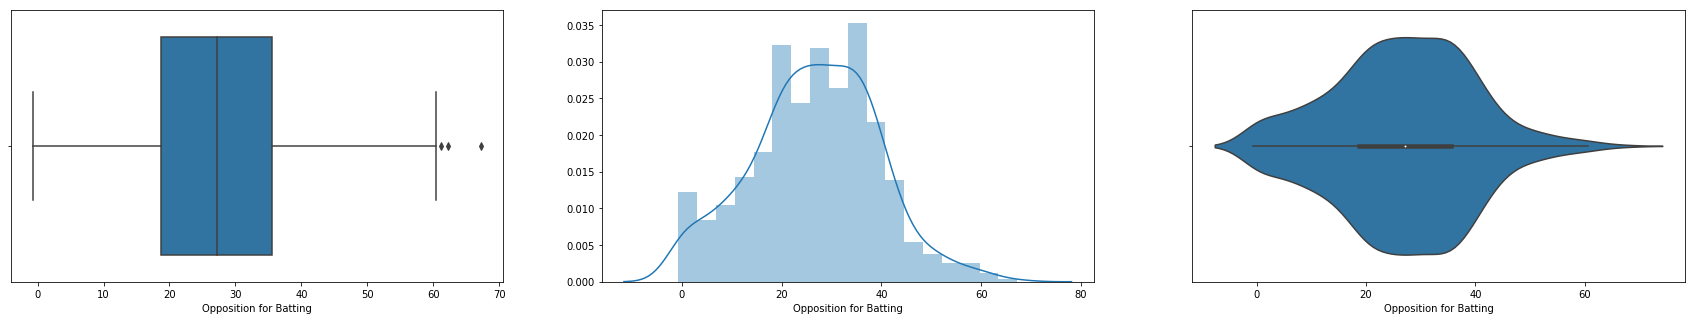



Total no. of entries :  631

The value for left whisker =  -6.418214499999994

Datapoints before left whisker : 
False    631
Name: Opposition for Batting, dtype: int64

The value for right whisker =  60.61555749999999

Datapoints before right whisker : 
False    628
True       3
Name: Opposition for Batting, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      19.002968
std        7.445410
min       -2.517066
25%       14.051668
50%       18.009977
75%       23.500825
max       75.604400
Name: Opposition for Bowling, dtype: float64




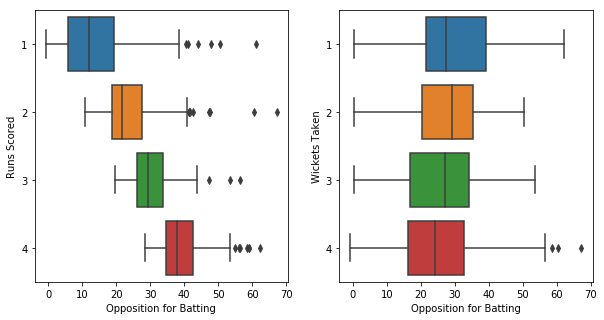

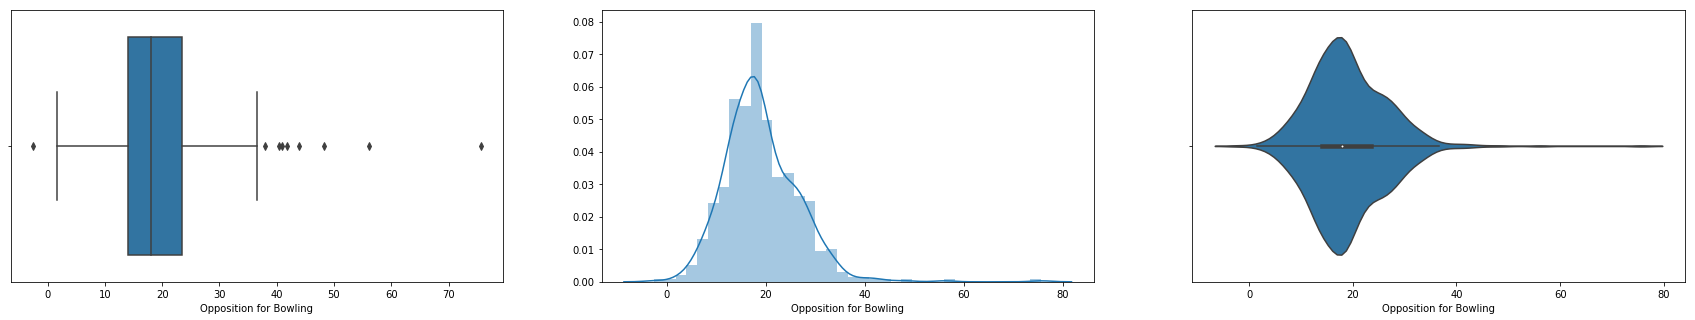



Total no. of entries :  631

The value for left whisker =  -0.12206874999999684

Datapoints before left whisker : 
False    630
True       1
Name: Opposition for Bowling, dtype: int64

The value for right whisker =  37.67456125

Datapoints before right whisker : 
False    623
True       8
Name: Opposition for Bowling, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      27.860836
std       13.456721
min       -1.086285
25%       19.054420
50%       28.225443
75%       37.276460
max       68.569029
Name: Venue for Batting, dtype: float64




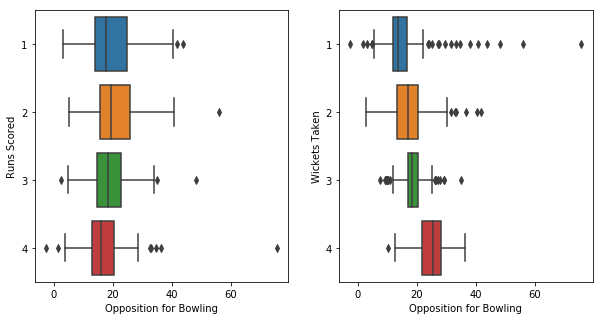

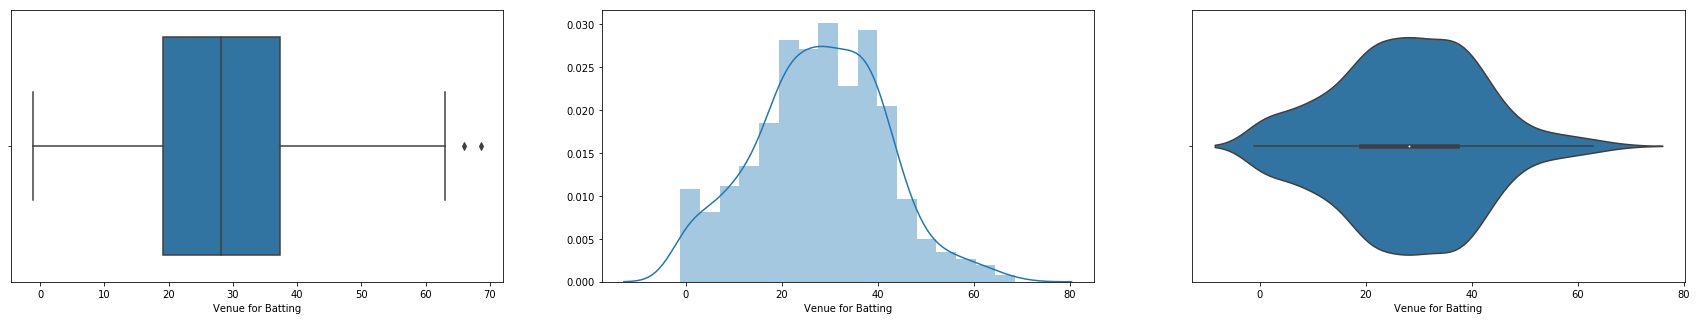



Total no. of entries :  631

The value for left whisker =  -8.278640096428198

Datapoints before left whisker : 
False    631
Name: Venue for Batting, dtype: int64

The value for right whisker =  64.60952005785691

Datapoints before right whisker : 
False    629
True       2
Name: Venue for Batting, dtype: int64


************************************Bivariate Analysis**************************************************




************************************Univariate Analysis**************************************************


count    631.000000
mean      17.900942
std        6.996054
min       -2.174277
25%       13.224629
50%       16.977850
75%       22.108365
max       71.518000
Name: Venue for Bowling, dtype: float64




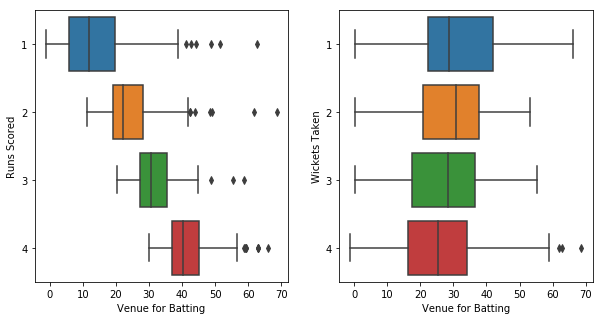

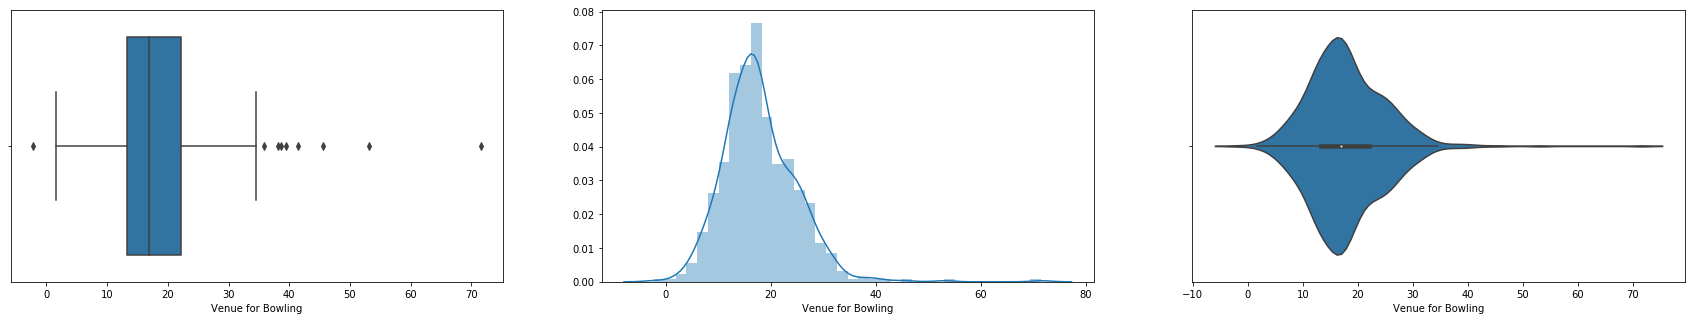



Total no. of entries :  631

The value for left whisker =  -0.10097499999999826

Datapoints before left whisker : 
False    630
True       1
Name: Venue for Bowling, dtype: int64

The value for right whisker =  35.433969

Datapoints before right whisker : 
False    623
True       8
Name: Venue for Bowling, dtype: int64


************************************Bivariate Analysis**************************************************






Batting Innings            None
Highest Score              None
Batting Average            None
Batting Strike Rate        None
100                        None
50                         None
0                          None
Bowling Innings            None
Overs Bowled               None
Bowling Average            None
Bowling Strike Rate        None
Four/Five Wicket Haul      None
Consistency for Batting    None
Consistency for Bowling    None
Form for Batting           None
Form for Bowling           None
Opposition for Batting     None
Opposition for Bowling     None
Venue for Batting          None
Venue for Bowling          None
dtype: object

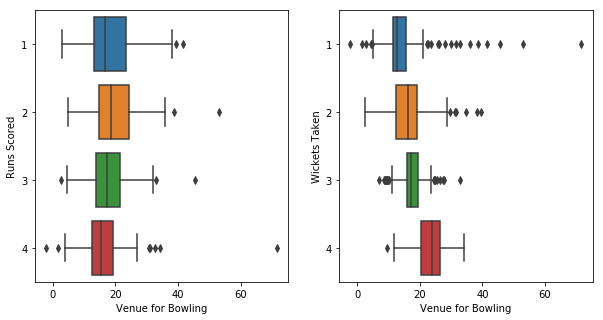

In [38]:
df1.apply(eda)

#### Predicting Runs Scored

Creating x and y variables and performing a train test split to test the following algorithms.

In [39]:
x = df.drop(["Runs Scored","Wickets Taken"],axis=1)
y = df["Runs Scored"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (504, 20)
xtest shape:  (127, 20)
ytrain shape:  (504,)
ytest shape:  (127,)


##### Logistic Regression 

In [40]:
LR = LogisticRegression()
predict_LR = LR.fit(xtrain,ytrain).predict(xtest)

C:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
classificationreport = classification_report(ytest,predict_LR)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.69      0.77      0.73        26
           2       0.82      0.62      0.71        37
           3       0.71      0.84      0.77        32
           4       0.84      0.84      0.84        32

    accuracy                           0.76       127
   macro avg       0.77      0.77      0.76       127
weighted avg       0.77      0.76      0.76       127



In [42]:
accuracy = accuracy_score(ytest,predict_LR)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7637795275590551


##### Decision Tree Classifier

In [43]:
DTC = DecisionTreeClassifier(random_state=0)
predict_DTC = DTC.fit(xtrain,ytrain).predict(xtest)

In [44]:
classificationreport = classification_report(ytest,predict_DTC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.65      0.85      0.73        26
           2       0.78      0.57      0.66        37
           3       0.78      0.91      0.84        32
           4       0.97      0.88      0.92        32

    accuracy                           0.79       127
   macro avg       0.79      0.80      0.79       127
weighted avg       0.80      0.79      0.78       127



In [45]:
accuracy = accuracy_score(ytest,predict_DTC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7874015748031497


##### Random Forest Classifier

In [46]:
RFC = RandomForestClassifier(random_state=0)
predict_RFC = RFC.fit(xtrain,ytrain).predict(xtest)

In [47]:
classificationreport = classification_report(ytest,predict_RFC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        26
           2       0.88      0.78      0.83        37
           3       0.82      0.97      0.89        32
           4       0.97      0.91      0.94        32

    accuracy                           0.87       127
   macro avg       0.88      0.88      0.87       127
weighted avg       0.88      0.87      0.87       127



In [48]:
accuracy = accuracy_score(ytest,predict_RFC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8740157480314961


##### K-Nearest Neighbors Classifier (KNN)

In [49]:
KNN = KNeighborsClassifier()
predict_KNN = KNN.fit(xtrain,ytrain).predict(xtest)

In [50]:
classificationreport = classification_report(ytest,predict_KNN)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.71      0.85      0.77        26
           2       0.79      0.62      0.70        37
           3       0.73      0.75      0.74        32
           4       0.85      0.91      0.88        32

    accuracy                           0.77       127
   macro avg       0.77      0.78      0.77       127
weighted avg       0.77      0.77      0.77       127



In [51]:
accuracy = accuracy_score(ytest,predict_KNN)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7716535433070866


##### Naive Bayes Classifier

In [52]:
NB = GaussianNB()
predict_NB = NB.fit(xtrain,ytrain).predict(xtest)

In [53]:
classificationreport = classification_report(ytest,predict_NB)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.81      0.85      0.83        26
           2       0.78      0.68      0.72        37
           3       0.62      0.88      0.73        32
           4       0.96      0.69      0.80        32

    accuracy                           0.76       127
   macro avg       0.79      0.77      0.77       127
weighted avg       0.79      0.76      0.77       127



In [54]:
accuracy = accuracy_score(ytest,predict_NB)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7637795275590551


##### Gradient Boosting Classifier

In [55]:
GBC = GradientBoostingClassifier(random_state=0)
predict_GBC = GBC.fit(xtrain,ytrain).predict(xtest)

In [56]:
classificationreport = classification_report(ytest,predict_GBC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.77      0.88      0.82        26
           2       0.89      0.68      0.77        37
           3       0.78      1.00      0.88        32
           4       1.00      0.88      0.93        32

    accuracy                           0.85       127
   macro avg       0.86      0.86      0.85       127
weighted avg       0.87      0.85      0.85       127



In [57]:
accuracy = accuracy_score(ytest,predict_GBC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8503937007874016


##### XGBoost Classifier

In [58]:
XGBC = XGBClassifier(random_state=0)
predict_XGBC = XGBC.fit(xtrain,ytrain).predict(xtest)

In [59]:
classificationreport = classification_report(ytest,predict_XGBC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.79      0.88      0.84        26
           2       0.90      0.70      0.79        37
           3       0.79      0.97      0.87        32
           4       0.97      0.91      0.94        32

    accuracy                           0.86       127
   macro avg       0.86      0.87      0.86       127
weighted avg       0.87      0.86      0.86       127



In [60]:
accuracy = accuracy_score(ytest,predict_XGBC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8582677165354331


##### Hyper-parameter tuning (Grid Search) model with the best classifier results from above which is Gradient Boosting Classifier

In [61]:
GBC = GradientBoostingClassifier(random_state=0)

In [62]:
params = {"min_samples_split": np.linspace(0.1,0.5,1,6),"min_samples_leaf": np.linspace(0.1,0.5,1,6),
          "max_features":["log2","sqrt"],'max_depth': [2,3,4,5,6,9]}
Grid_GBC = GridSearchCV(GBC,cv=5,param_grid=params)
Grid_GBC.fit(xtrain,ytrain)
print('Best Parameters using grid search:', Grid_GBC.best_params_)

Best Parameters using grid search: {'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [63]:
GBC = GradientBoostingClassifier(random_state=0,max_depth=3,max_features="log2",min_samples_leaf=0.1,min_samples_split=0.1)
predict_GBC_Grid = GBC.fit(xtrain,ytrain).predict(xtest)

In [64]:
classificationreport = classification_report(ytest,predict_GBC_Grid)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.77      0.88      0.82        26
           2       0.89      0.68      0.77        37
           3       0.82      0.97      0.89        32
           4       0.97      0.94      0.95        32

    accuracy                           0.86       127
   macro avg       0.86      0.87      0.86       127
weighted avg       0.87      0.86      0.86       127



In [65]:
accuracy = accuracy_score(ytest,predict_GBC_Grid)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8582677165354331


After doing hyper-parameter tuning of the gradient boosting classifier, we observed the accuracy of the model got slightly less but the F1 score got increased meaning it is better to predict specific classes in the target variable.

In [66]:
from PIL import Image 
im = Image.open(r"C:\Users\Toshiba\Desktop\Runs scored models.PNG")  
im.show() # All models evaluatory metrics for the prediction of Runs Scored

#### Predicting Wickets Taken

Splitting into x and y and then train-test split to test the models.

In [67]:
x = df.drop(["Runs Scored","Wickets Taken"],axis=1)
y = df["Wickets Taken"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (504, 20)
xtest shape:  (127, 20)
ytrain shape:  (504,)
ytest shape:  (127,)


##### Logistic Regression

In [68]:
LR = LogisticRegression()
predict_LR = LR.fit(xtrain,ytrain).predict(xtest)

C:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [69]:
classificationreport = classification_report(ytest,predict_LR)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.97      0.87      0.92        38
           2       0.81      0.86      0.83        29
           3       0.88      0.97      0.92        31
           4       1.00      0.97      0.98        29

    accuracy                           0.91       127
   macro avg       0.91      0.92      0.91       127
weighted avg       0.92      0.91      0.91       127



In [70]:
accuracy = accuracy_score(ytest,predict_LR)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9133858267716536


##### Decision Tree Classifier

In [71]:
DTC = DecisionTreeClassifier(random_state=0)
predict_DTC = DTC.fit(xtrain,ytrain).predict(xtest)

In [72]:
classificationreport = classification_report(ytest,predict_DTC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.92      0.87      0.89        38
           2       0.76      0.90      0.83        29
           3       0.93      0.87      0.90        31
           4       0.96      0.93      0.95        29

    accuracy                           0.89       127
   macro avg       0.89      0.89      0.89       127
weighted avg       0.90      0.89      0.89       127



In [73]:
accuracy = accuracy_score(ytest,predict_DTC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.889763779527559


##### Random Forest Classifier

In [74]:
RFC = RandomForestClassifier(random_state=0)
predict_RFC = RFC.fit(xtrain,ytrain).predict(xtest)

In [75]:
classificationreport = classification_report(ytest,predict_RFC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.94      0.89      0.92        38
           2       0.82      0.93      0.87        29
           3       0.97      0.90      0.93        31
           4       0.97      0.97      0.97        29

    accuracy                           0.92       127
   macro avg       0.92      0.92      0.92       127
weighted avg       0.93      0.92      0.92       127



In [76]:
accuracy = accuracy_score(ytest,predict_RFC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9212598425196851


##### KNN Classifier

In [77]:
KNN = KNeighborsClassifier()
predict_KNN = KNN.fit(xtrain,ytrain).predict(xtest)

In [78]:
classificationreport = classification_report(ytest,predict_KNN)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.88      0.61      0.72        38
           2       0.51      0.79      0.62        29
           3       0.76      0.81      0.78        31
           4       1.00      0.79      0.88        29

    accuracy                           0.74       127
   macro avg       0.79      0.75      0.75       127
weighted avg       0.79      0.74      0.75       127



In [79]:
accuracy = accuracy_score(ytest,predict_KNN)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7401574803149606


#####  Naive Bayes Classifier

In [80]:
NB = GaussianNB()
predict_NB = NB.fit(xtrain,ytrain).predict(xtest)

In [81]:
classificationreport = classification_report(ytest,predict_NB)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.81      0.58      0.68        38
           2       0.49      0.69      0.57        29
           3       0.81      0.84      0.83        31
           4       1.00      0.93      0.96        29

    accuracy                           0.75       127
   macro avg       0.78      0.76      0.76       127
weighted avg       0.78      0.75      0.75       127



In [82]:
accuracy = accuracy_score(ytest,predict_NB)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7480314960629921


#####  Gradient Boosting Classifier

In [83]:
GBC = GradientBoostingClassifier(random_state=0)
predict_GBC = GBC.fit(xtrain,ytrain).predict(xtest)

In [84]:
classificationreport = classification_report(ytest,predict_GBC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.94      0.89      0.92        38
           2       0.82      0.93      0.87        29
           3       0.97      0.94      0.95        31
           4       1.00      0.97      0.98        29

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127



In [85]:
accuracy = accuracy_score(ytest,predict_GBC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9291338582677166


#### XGBoost Classifier

In [86]:
XGBC = XGBClassifier(random_state=0)
predict_XGBC = XGBC.fit(xtrain,ytrain).predict(xtest)

In [87]:
classificationreport = classification_report(ytest,predict_XGBC)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.94      0.89      0.92        38
           2       0.82      0.93      0.87        29
           3       0.97      0.94      0.95        31
           4       1.00      0.97      0.98        29

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127



In [88]:
accuracy = accuracy_score(ytest,predict_XGBC)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9291338582677166


##### Hyper-parameter tuning (Grid Search) model with the best classifier results from above which is XGBoost Classifier

In [89]:
XGBC = XGBClassifier(random_state=0)

In [90]:
params = {"min_samples_split": np.linspace(0.1,0.5,1,6),"min_samples_leaf": np.linspace(0.1,0.5,1,6),
          "max_features":["log2","sqrt"],'max_depth': [2,3,4,5,6,9]}
Grid_XGBC = GridSearchCV(XGBC,cv=5,param_grid=params)
Grid_XGBC.fit(xtrain,ytrain)
print('Best Parameters using grid search:', Grid_XGBC.best_params_)

Best Parameters using grid search: {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [91]:
XGBC = XGBClassifier(random_state=0,max_depth=6,max_features="log2",min_samples_leaf=0.1,min_samples_split=0.1)
predict_XGBC_Grid = XGBC.fit(xtrain,ytrain).predict(xtest)

In [92]:
classificationreport = classification_report(ytest,predict_XGBC_Grid)
print("Classification Report is:")
print()
print(classificationreport)

Classification Report is:

              precision    recall  f1-score   support

           1       0.94      0.89      0.92        38
           2       0.82      0.93      0.87        29
           3       0.97      0.94      0.95        31
           4       1.00      0.97      0.98        29

    accuracy                           0.93       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.93      0.93      0.93       127



In [93]:
accuracy = accuracy_score(ytest,predict_XGBC_Grid)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9291338582677166


In [94]:
from PIL import Image 
im = Image.open(r"C:\Users\Toshiba\Desktop\Wickets Taken Model.PNG")  
im.show() # All models evaluatory metrics for the prediction of Wickets Taken